In [27]:
# Import necessary libraries
import numpy as np   # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for plotting

# Use yfinance to fetch stock market data
import yfinance as yf


In [28]:
# Import necessary libraries
from datetime import datetime  # Import datetime module for date and time operations
import yfinance as yf  # Import yfinance for downloading stock data

# Define start date for fetching stock data
start = '2012-01-01'

# Get today's date and format it as 'YYYY-MM-DD' using strftime
end = datetime.today().strftime('%Y-%m-%d')

# Stock ticker symbol for which you want to fetch data
stock = 'RVNL.BO'

# Download stock data using yfinance library from 'start' to 'end' date
data = yf.download(stock, start, end)

# 'data' now contains the stock data from 'start' to today's date ('end')


[*********************100%%**********************]  1 of 1 completed


In [29]:
# Reset index of the dataframe 'data' to default integers
data.reset_index(inplace=True)


In [30]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-11,19.000000,19.750000,18.600000,19.049999,15.904095,11152230
1,2019-04-12,19.200001,19.850000,19.200001,19.750000,16.488503,3330561
2,2019-04-15,19.950001,23.700001,19.900000,23.650000,19.744457,10795990
3,2019-04-16,24.750000,26.950001,24.200001,25.600000,21.372435,10874870
4,2019-04-18,26.250000,26.850000,25.150000,26.150000,21.831608,5313229
...,...,...,...,...,...,...,...
1269,2024-07-03,416.000000,421.000000,414.899994,416.850006,416.850006,1619640
1270,2024-07-04,418.549988,431.000000,417.350006,418.750000,418.750000,917386
1271,2024-07-05,425.000000,498.049988,424.200012,491.450012,491.450012,14175680
1272,2024-07-08,508.299988,578.950012,508.100006,565.799988,565.799988,14272250


# 100 day Moving Average

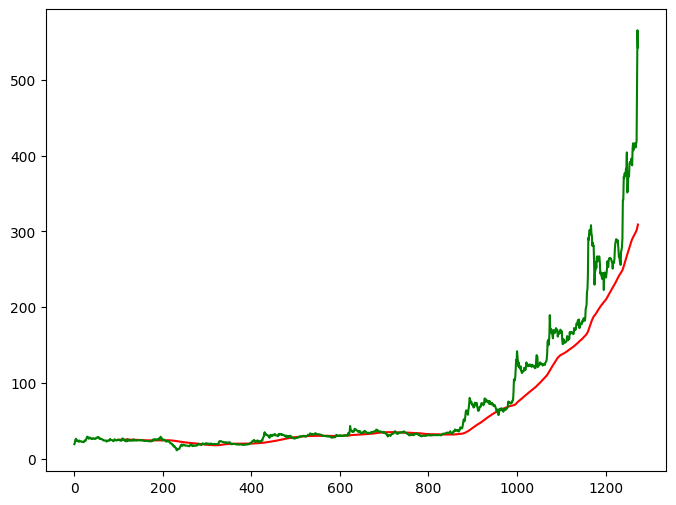

In [31]:
# Calculate the 100-day moving average of the 'Close' price from the 'data' dataframe
moving_average_100_days = data.Close.rolling(100).mean()

# Create a new figure with a specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8, 6))

# Plot the 100-day moving average data in red ('r')
plt.plot(moving_average_100_days, 'r')

# Plot the 'Close' price data in green ('g')
plt.plot(data.Close, 'g')

# Display the plot
plt.show()


# 25 Day Exponential Moving Average

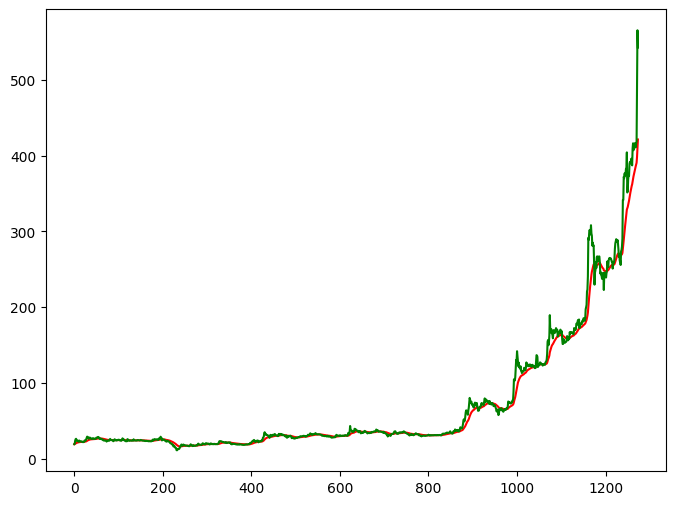

In [32]:
# Calculate EMA with a span of 25 days
ema_100_days = data['Close'].ewm(span=25, adjust=False).mean()
# Create a new figure with a specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8, 6))

# Plot the 25-day exponential moving average data in red ('r')
plt.plot(ema_100_days, 'r')

# Plot the 'Close' price data in green ('g')
plt.plot(data.Close, 'g')

# Display the plot
plt.show()

# 200 days Moving Average

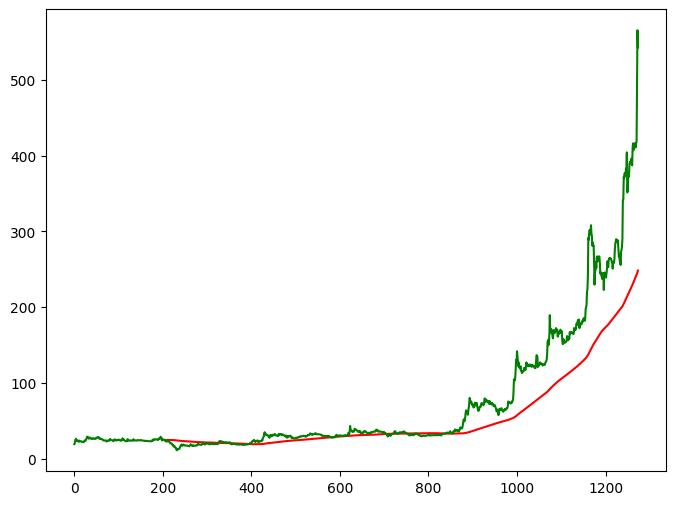

In [33]:
# Calculate the 200-day moving average of the 'Close' price from the 'data' dataframe
moving_average_200_days = data.Close.rolling(200).mean()

# Create a new figure with a specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8, 6))

# Plot the 200-day moving average data in red ('r')
plt.plot(moving_average_200_days, 'r')

# Plot the 'Close' price data in green ('g')
plt.plot(data.Close, 'g')

# Display the plot
plt.show()

# 50 days Exponential Moving Average

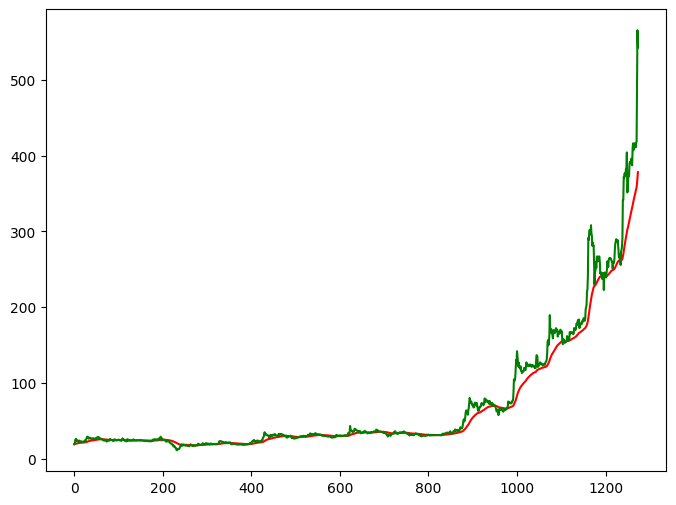

In [34]:
# Calculate EMA with a span of 50 days
ema_50_days = data['Close'].ewm(span=50, adjust=False).mean()
# Create a new figure with a specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8, 6))

# Plot the 50-day exponential moving average data in red ('r')
plt.plot(ema_50_days, 'r')

# Plot the 'Close' price data in green ('g')
plt.plot(data.Close, 'g')

# Display the plot
plt.show()

# Moving Average 100days + 200days

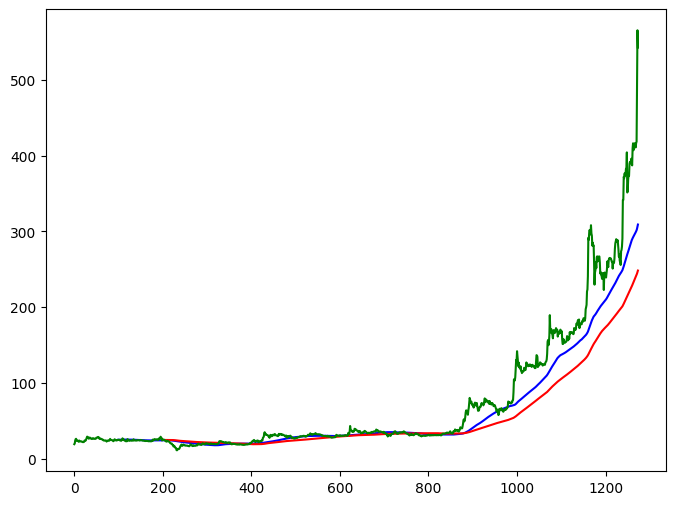

In [35]:
plt.figure(figsize=(8,6))
plt.plot(moving_average_100_days, 'b')
plt.plot(moving_average_200_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [36]:
# Remove rows with missing values (NaN) from the 'data' dataframe
data.dropna(inplace=True)


## Splitting Data in Training and Test Data

In [37]:
# Splitting the 'Close' price data into training and testing sets

# Calculate the index for splitting the data
split_index = int(len(data) * 0.80)

# Create a DataFrame for training data containing the first 80% of 'Close' prices
data_train = pd.DataFrame(data.Close[0:split_index])

# Create a DataFrame for testing data containing the remaining 20% of 'Close' prices
data_test = pd.DataFrame(data.Close[split_index:len(data)])


In [42]:
# Checking the number of rows (observations) in the training and testing datasets

# Number of rows in the training dataset (data_train)
train_rows = data_train.shape[0]

# Number of rows in the testing dataset (data_test)
test_rows = data_test.shape[0]

print(train_rows)
print(test_rows)

1019
255


### Scaling

In [43]:
# Create a MinMaxScaler object with a specified feature range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
# Prepare data sequences for LSTM modeling

x = []
y = []

# Iterate through data_train_scale to create sequences of length 100 for x and corresponding labels for y
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])  # Append sequences of 100 data points
    y.append(data_train_scale[i, 0])     # Append the label (target value) for each sequence

## Purpose
This loop prepares sequences (`x`) and corresponding labels (`y`) for training a Long Short-Term Memory (LSTM) model. LSTM models in deep learning often require input data to be organized into sequences, where each sequence consists of a fixed number of time steps or data points.

- `range(100, data_train_scale.shape[0])`: Iterates through `data_train_scale` starting from index 100 to the end (`data_train_scale.shape[0]`), ensuring that each sequence (`x`) contains 100 data points.

- `x.append(data_train_scale[i-100:i])`: Constructs sequences (`x`) of 100 consecutive data points (time steps) from `data_train_scale`, representing the input features for the LSTM model.

- `y.append(data_train_scale[i, 0])`: Collects the corresponding label (`y`) for each sequence, typically representing the target value to be predicted by the model.

## Data Structure
After execution, `x` will contain sequences of shape `(number_of_sequences, sequence_length, num_features)` suitable for LSTM input, and `y` will contain the corresponding target values.

This code segment is crucial for preparing time series data in a format suitable for training deep learning models like LSTMs, ensuring that the model can learn temporal dependencies and make predictions based on historical data sequences.


In [47]:
# Convert x and y lists to NumPy arrays for compatibility with machine learning models
x, y = np.array(x), np.array(y)

In [48]:
# Importing necessary layers and models from Keras for building a sequential LSTM model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

### LSTMs are suitable for learning patterns in sequences, making them useful for time series prediction tasks.

In [49]:
# Constructing a sequential LSTM model architecture

model = Sequential()

# Adding the first LSTM layer with 50 units, ReLU activation, and input shape defined by x.shape[1]
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))  # Adding dropout regularization to prevent overfitting

# Adding a second LSTM layer with 60 units and ReLU activation
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Adding dropout regularization

# Adding a third LSTM layer with 80 units and ReLU activation
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Adding dropout regularization

# Adding a fourth LSTM layer with 120 units and ReLU activation
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout regularization

# Adding a dense output layer with 1 unit
model.add(Dense(units=1))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# Compile the LSTM model with the Adam optimizer and mean squared error loss function

model.compile(optimizer='adam', loss='mean_squared_error')


In [52]:
# Train the LSTM model on the training data

model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0349
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.0073
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0056
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0043
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.0053
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0061
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0054
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0042
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 0.0032
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0032
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 0.0032
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0026
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 0.0030
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 0.0033
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - lo

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [55]:
# Extract the last 100 data points from the training data

pas_100_days = data_train.tail(100)


In [56]:
# Combine the last 100 data points of the training set with the test set for continuity in the sequences
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

# Scale the combined test data using the previously defined MinMaxScaler
data_test_scale = scaler.fit_transform(data_test)

# Prepare sequences (x) and corresponding labels (y) from the scaled test data
x = []
y = []

# Iterate through the scaled test data to create sequences of 100 data points and their corresponding labels
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])  # Append a sequence of 100 data points to x
    y.append(data_test_scale[i, 0])     # Append the corresponding label to y

# Convert the lists of sequences and labels to NumPy arrays
x, y = np.array(x), np.array(y)


In [58]:
# Use the trained LSTM model to make predictions on the test data sequences

y_predict = model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [59]:
# Inverse scaling of the predictions and actual values

scale = 1 / scaler.scale_  # Calculate the inverse of the scaling factor used in MinMaxScaler

# Multiply the predicted values and actual values by the inverse scaling factor to revert them back to their original scale
y_predict = y_predict * scale
y = y * scale

# Original vs Predicted

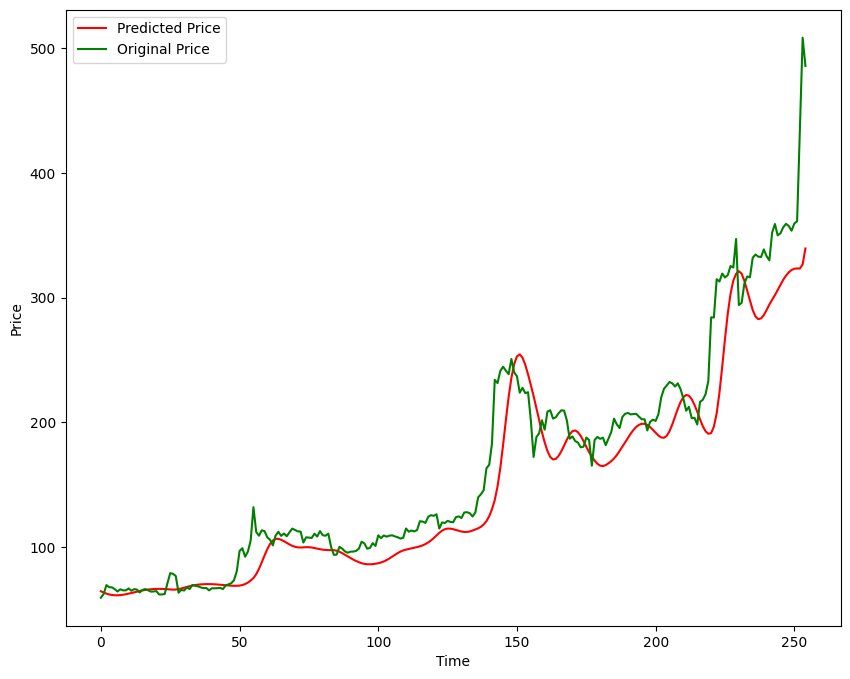

In [61]:
# Plot the predicted and original prices

plt.figure(figsize=(10, 8))  # Set the size of the plot to 10 inches by 8 inches

# Plot the predicted prices in red with the label 'Predicted Price'
plt.plot(y_predict, 'r', label='Predicted Price')

# Plot the original prices in green with the label 'Original Price'
plt.plot(y, 'g', label='Original Price')

plt.xlabel('Time')  # Label the x-axis as 'Time'
plt.ylabel('Price')  # Label the y-axis as 'Price'

plt.legend()  # Add a legend to the plot to differentiate between the predicted and original prices
plt.show()  # Display the plot


In [62]:
model.save('Stock_Price_Prediction.keras')
model.save('Stock_Price_Prediction.h5')